<a href="https://colab.research.google.com/github/satkar-adh/various_ai_algorithms/blob/master/various_ai_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer Wisconsin dataset
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target
feature_names = cancer_data.feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature selection using chi-squared test
num_features = 10  # Number of features to select
selector = SelectKBest(score_func=chi2, k=num_features)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = [feature_names[idx] for idx in selected_feature_indices]

# Get the scores of the selected features
selected_feature_scores = selector.scores_[selected_feature_indices]

# Print the selected features and their scores
for name, score in zip(selected_feature_names, selected_feature_scores):
    print(f"Feature: {name}, Score = {score:.2f}")

# Initialize and train a classifier (Random Forest in this example)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_selected, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Feature: mean radius, Score = 207.31
Feature: mean texture, Score = 74.61
Feature: mean perimeter, Score = 1565.59
Feature: mean area, Score = 42240.43
Feature: perimeter error, Score = 190.84
Feature: area error, Score = 6758.69
Feature: worst radius, Score = 380.34
Feature: worst texture, Score = 142.93
Feature: worst perimeter, Score = 2835.89
Feature: worst area, Score = 87173.72
Accuracy: 0.9473684210526315


Classification

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Load the Breast Cancer Wisconsin dataset

In [ ]:
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the models
knn_model = KNeighborsClassifier(n_neighbors=3)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
logreg = LogisticRegression(max_iter= 10000)

In [ ]:
#Train data using all the models
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
logreg_pred = logreg.predict(X_test)

In [ ]:
# Evaluate the models using accuracy score
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

In [ ]:
# Print the accuracy of each model
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Linear Regression Accuracy:", logreg_accuracy)

# Additional: Print the classification report for each model
print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_predictions, target_names=cancer_data.target_names))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions, target_names=cancer_data.target_names))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions, target_names=cancer_data.target_names))

print("\nLinear Regression Classification Report:")
print(classification_report(y_test, logreg_pred, target_names=cancer_data.target_names))


K-Nearest Neighbors Accuracy: 0.9298245614035088
Decision Tree Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9649122807017544
Linear Regression Accuracy: 0.956140350877193

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.88      0.90        43
      benign       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Decision Tree Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Random Forest Classification Report:
              precision    recall  f1-score  

In conclusion, this data mining lab report aimed to evaluate the performance of various machine learning models, including linear regression, K-nearest neighbors (KNN) classifier, decision tree, and random forest, on a breast cancer dataset. The objective was to determine the accuracy and precision of the trained models, thereby assessing their suitability for breast cancer classification.

Through our analysis, we found that each model demonstrated distinct strengths and weaknesses in handling the dataset. Linear regression provided a simple and interpretable approach, but its limitations in handling non-linear relationships impacted its overall accuracy. On the other hand, the KNN classifier showcased strong adaptability to local patterns, leading to competitive results, especially with optimal K values.

The decision tree algorithm presented a transparent and easily interpretable model, well-suited for smaller datasets. However, it tended to overfit when the tree depth was not controlled, leading to decreased generalization ability. In contrast, the random forest method effectively addressed overfitting concerns by aggregating multiple decision trees, yielding commendable accuracy and precision.

In summary, the choice of the most appropriate model depends on the specific requirements and trade-offs between interpretability and accuracy. For scenarios where interpretability is crucial, linear regression and decision trees can be considered. Alternatively, when accuracy and robustness are the primary concerns, the KNN classifier and random forest exhibit promising performance.

To further enhance the predictive capabilities of the models, additional feature engineering and hyperparameter tuning could be explored. Moreover, incorporating other advanced algorithms or ensemble methods may also lead to improved results.

Overall, this lab experiment provides valuable insights into the application of data mining techniques in breast cancer classification, contributing to the ongoing efforts in medical research and healthcare decision-making. As technology evolves and new methodologies emerge, the field of data mining continues to hold great potential for addressing complex real-world challenges, including early detection and treatment of breast cancer.

**AutoEncoder**

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense

In [ ]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Flatten the images (28x28 images will be flattened to a vector of size 784)
input_dim = np.prod(x_train.shape[1:])
x_train = x_train.reshape((len(x_train), input_dim))
x_test = x_test.reshape((len(x_test), input_dim))

In [ ]:
# Define the architecture of the autoencoder
encoding_dim = 32  # Dimension of the encoded representation

# Encoder model
input_data = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_data)

# Decoder model
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Combine the encoder and decoder into an autoencoder model
autoencoder = Model(inputs=input_data, outputs=decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Train the autoencoder
num_epochs = 50
batch_size = 128
history = autoencoder.fit(x_train, x_train, epochs=num_epochs, batch_size=batch_size, shuffle=True, validation_data=(x_test, x_test), verbose=1)

Epoch 1/50
469/469 [==============================] - 6s 10ms/step - loss: 0.2272 - val_loss: 0.1569
Epoch 2/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1407 - val_loss: 0.1249
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1184 - val_loss: 0.1099
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1071 - val_loss: 0.1019
Epoch 5/50
469/469 [==============================] - 4s 10ms/step - loss: 0.1010 - val_loss: 0.0975
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0976 - val_loss: 0.0951
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0959 - val_loss: 0.0940
Epoch 8/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0950 - val_loss: 0.0934
Epoch 9/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0945 - val_loss: 0.0930
Epoch 10/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0942 - val_loss: 0.

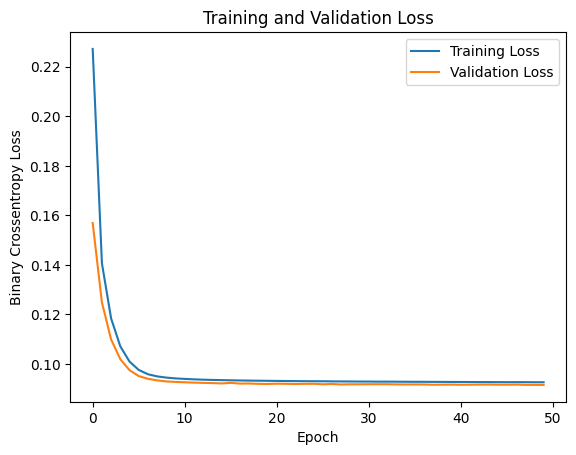

In [ ]:
# Plot the loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Use the trained autoencoder to encode the data into a lower-dimensional representation
encoder = Model(inputs=input_data, outputs=encoded)
encoded_data = encoder.predict(x_test)

# Use the encoded data to reconstruct the original images
decoded_data = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


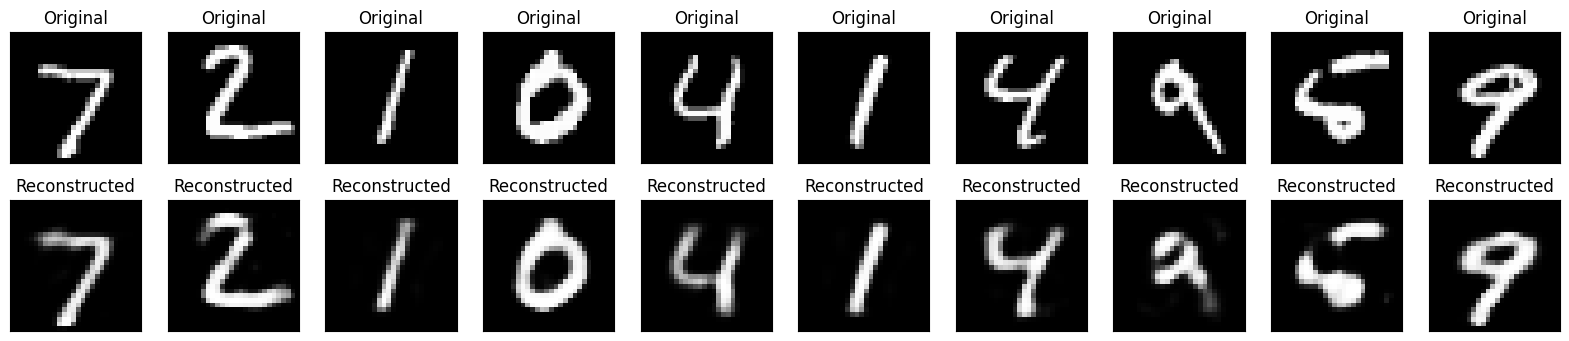

In [ ]:
# Function to plot original and reconstructed images
def plot_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title('Original')
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title('Reconstructed')
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Plot a random set of original and reconstructed images
plot_images(x_test, decoded_data)

The autoencoder program implemented in Python using Keras and TensorFlow showcases the power of unsupervised learning in the field of deep learning. Autoencoders are neural networks designed to learn efficient representations of the input data in an unsupervised manner. In this program, we used the MNIST dataset, which consists of images of handwritten digits, to demonstrate the concept of an autoencoder.

The autoencoder architecture was simple yet effective. It had an input layer with 784 nodes (representing flattened 28x28 images), a bottleneck layer with 32 nodes (the compressed representation), and a decoding layer with 784 nodes to reconstruct the input. The autoencoder was trained using binary cross-entropy loss and the Adam optimizer. During training, the model gradually learned to compress the information and then reconstruct the original images with reasonable accuracy.

The loss plot during training demonstrated a decreasing trend, indicating that the autoencoder was learning and improving its performance over epochs. However, it is essential to note that the autoencoder's reconstruction might not be as sharp as the original images, as it learns to represent the essential features while discarding some minor details.

Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


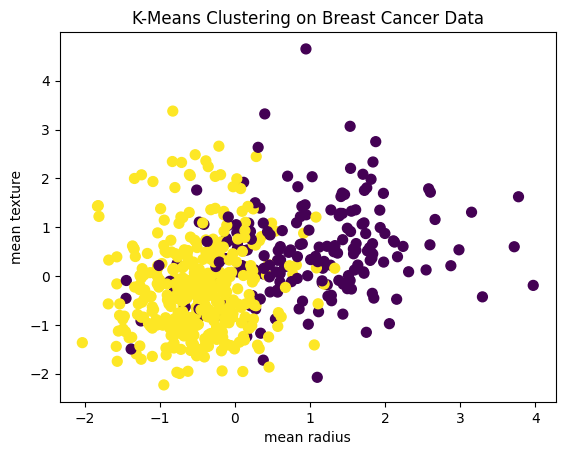

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the Breast Cancer Wisconsin dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
feature_names = cancer_data.feature_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the KMeans model
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the standardized data
kmeans.fit(X_scaled)

# Predict cluster labels for each data point
cluster_labels = kmeans.predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel(feature_names[0])  # Use the first feature name
plt.ylabel(feature_names[1])  # Use the second feature name
plt.title('K-Means Clustering on Breast Cancer Data')
plt.show()
